In [7]:
import pandas as pd
import numpy as np 

from clean import clean_json
from scrape import scrape_multiple_years
import os

In [8]:
input_path = os.path.join('data\datasets','2016_to_2017.json')
output_path = os.path.join('data\datasets','2016_to_2017.csv')

In [9]:
df = clean_json(input_path, output_path)

In [10]:
df.head()

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength
0,1,REGULAR,01:11,2016020001,10,Toronto Maple Leafs,Shot,Mitchell Marner,Craig Anderson,Wrist Shot,-77.0,5.0,NaN,NaN
1,1,REGULAR,02:53,2016020001,9,Ottawa Senators,Shot,Chris Kelly,Frederik Andersen,Wrist Shot,86.0,13.0,NaN,NaN
2,1,REGULAR,04:01,2016020001,9,Ottawa Senators,Shot,Cody Ceci,Frederik Andersen,Wrist Shot,23.0,-38.0,NaN,NaN
3,1,REGULAR,04:46,2016020001,9,Ottawa Senators,Shot,Erik Karlsson,Frederik Andersen,Slap Shot,33.0,-15.0,NaN,NaN
4,1,REGULAR,06:46,2016020001,10,Toronto Maple Leafs,Shot,Martin Marincin,Craig Anderson,Wrist Shot,-34.0,28.0,NaN,NaN


QUESTION 1 : 

In [11]:
shot_df = df[df['play_type'] == 'Shot']
goal_df = df[df['play_type'] == 'Goal']

In [12]:
shot_count = shot_df['shot_type'].value_counts()
goal_count = goal_df['shot_type'].value_counts()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

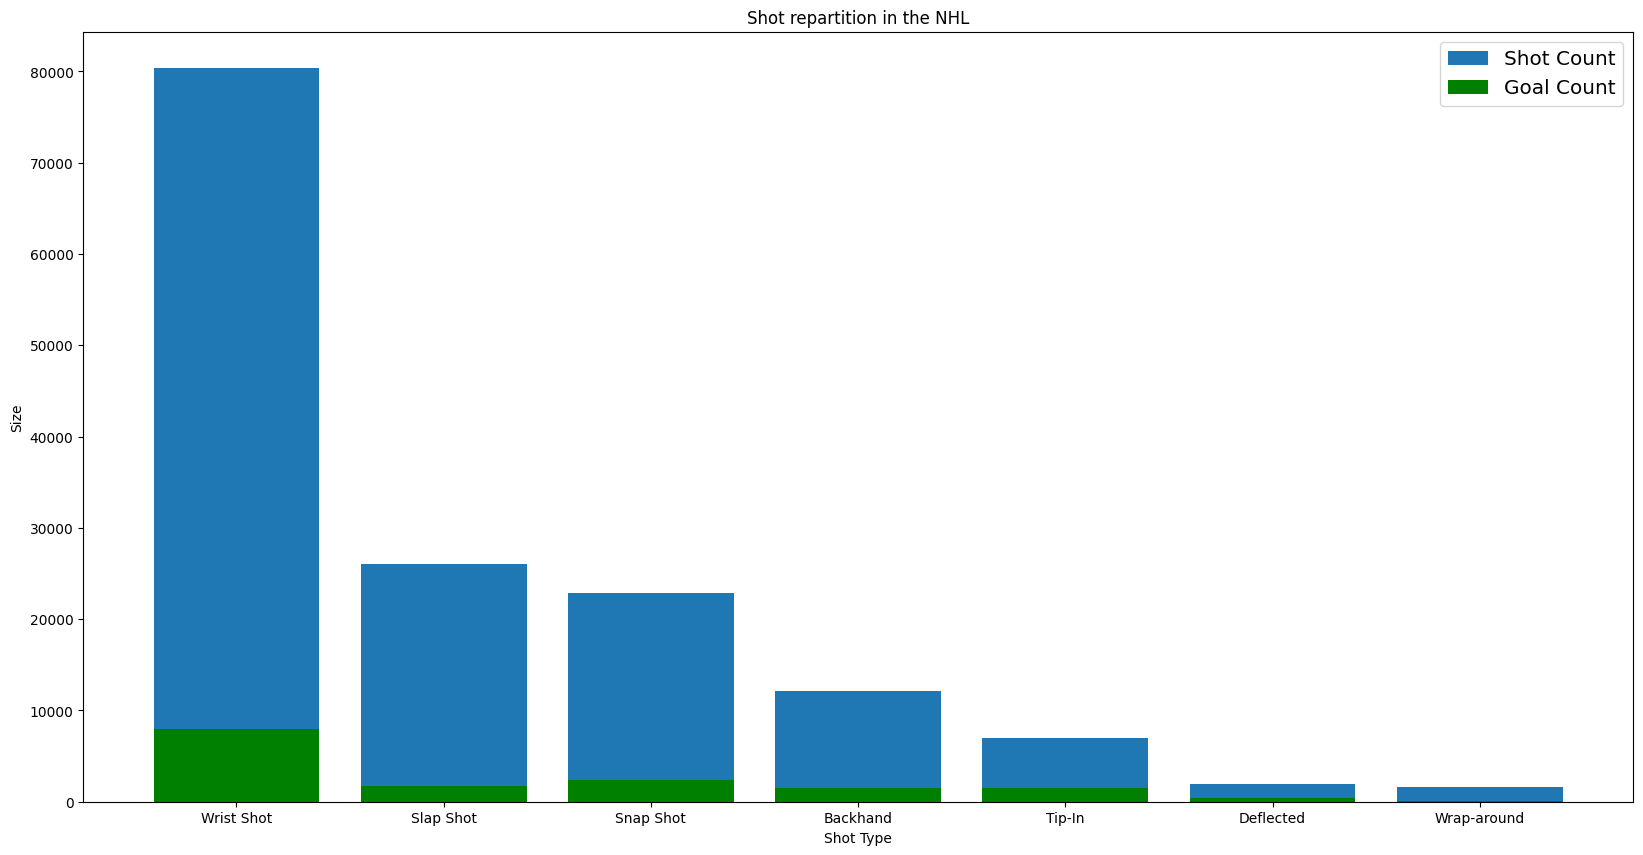

In [57]:
plt.figure(figsize = (20,10))

plt.bar(shot_count.index, shot_count.values, label ='Shot Count')
plt.bar(goal_count.index, goal_count.values, color = 'green', label = 'Goal Count')

plt.xlabel('Shot Type')
plt.ylabel('Size')
plt.title('Shot repartition in the NHL')

plt.legend(fontsize='x-large')

plt.show()

In [66]:
goal_proportion = pd.DataFrame(goal_count/shot_count)
goal_proportion

,count
shot_type,
Backhand,0.124135
Deflected,0.231194
Slap Shot,0.065872
Snap Shot,0.102371
Tip-In,0.211760
Wrap-around,0.080946
Wrist Shot,0.098598


On voit que le type de tir le plus courant est le 'Wrist shot'. Le type de tir le plus efficace est le 'Deflected' qui est suivi de près par le 'Tip-In'; cependant ces tirs sont plus rares. 

Le choix d'un histogramme nous permet de mieux visualiser le volume de tir pour chaque type de tir, ainsi que la proportion de buts.

In [15]:
team_list = df['attacking_team_name'].unique()
print(team_list)

['Toronto Maple Leafs' 'Ottawa Senators' 'St. Louis Blues'
 'Chicago Blackhawks' 'Edmonton Oilers' 'Calgary Flames'
 'Los Angeles Kings' 'San Jose Sharks' 'Montréal Canadiens'
 'Buffalo Sabres' 'New York Rangers' 'New York Islanders'
 'Washington Capitals' 'Pittsburgh Penguins' 'Boston Bruins'
 'Columbus Blue Jackets' 'Detroit Red Wings' 'Tampa Bay Lightning'
 'New Jersey Devils' 'Florida Panthers' 'Minnesota Wild'
 'Carolina Hurricanes' 'Winnipeg Jets' 'Anaheim Ducks' 'Dallas Stars'
 'Nashville Predators' 'Philadelphia Flyers' 'Colorado Avalanche'
 'Arizona Coyotes' 'Vancouver Canucks' 'Vegas Golden Knights']


In [49]:
def hist_shot_repartition_by_team(team_name : str, df : pd.DataFrame): 
    """"
    This function returns a histogram showing the count of each shot type
    for a specific team
    """
    
    team_shot_count = df[(df['play_type'] == 'Shot') & (df['attacking_team_name'] == team_name)]
    team_goal_count = df[(df['play_type'] == 'Goal') & (df['attacking_team_name'] == team_name)]

    shot_count = team_shot_count['shot_type'].value_counts()
    goal_count = team_goal_count['shot_type'].value_counts()

    plt.figure(figsize = (20,10))
    plt.bar(shot_count.index, shot_count.values, alpha = 0.9, label ='Shot Count')
    plt.bar(goal_count.index, goal_count.values, alpha = 0.5, label = 'Goal count')

    plt.xlabel('Shot Type')
    plt.ylabel('Size')
    plt.title(f"Shot repartition for {team_name}")

    plt.legend(fontsize='x-large')

    plt.show()


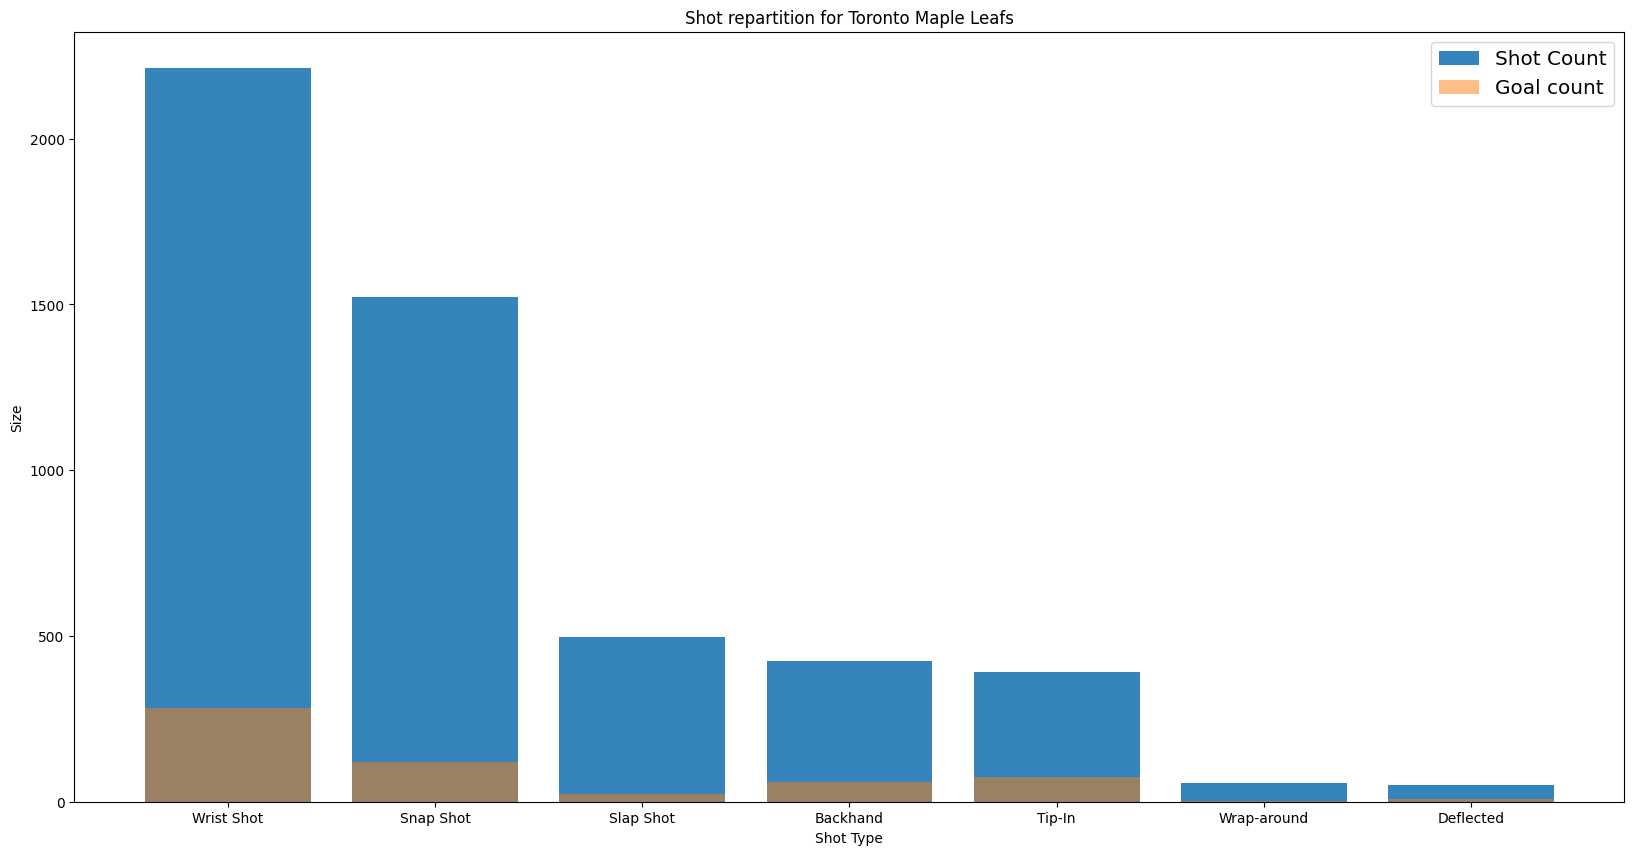

In [54]:
# SHOT REPARTITION FOR THE TORONTO MAPLE LEAFS
hist_shot_repartition_by_team(team_list[0],df)

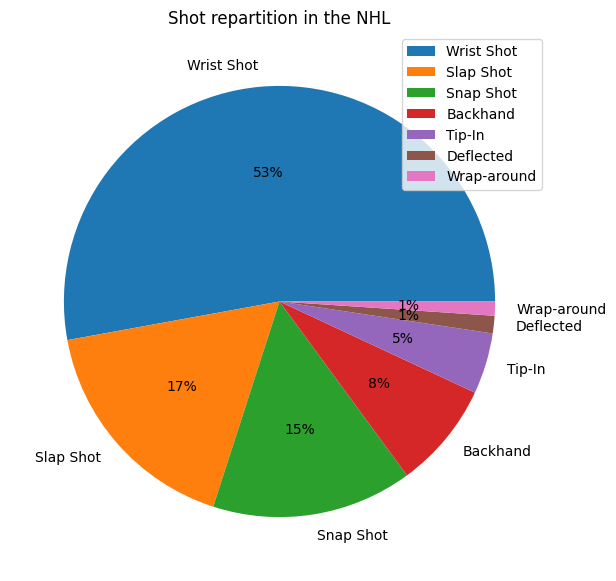

In [74]:
# Une autre forme de visualisation (Meilleure pour voir la répartition des tirs)
# Source : https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/

fig, ax = plt.subplots(figsize=(12,7))

ax.pie(shot_count.values, radius=1,
       labels = shot_count.index, autopct='%.0f%%')

ax.set(aspect="equal", title='Shot repartition in the NHL')
plt.legend(shot_count.index, loc = "upper right")
plt.show()

QUESTION 2 : (TO BE CONTINUED)

In [4]:
def find_net(period : int, home_team : str, attacking_team: str) :
    if attacking_team == home_team :
        if (period == 1) | (period == 3) :
            return 'right'
        else :
            return 'left'
    else :
        if (period == 1) | (period == 3):
            return 'left'
        else :
            return 'right'

In [5]:
def compute_distance_to_net(coordinate_x : float, coordinate_y : float, attacking_team : str, home_team : str, period : int):
    """This function determines the net where the attacking team shoots during the play
      and then computes the distance to the net"""
    
    net_side = find_net(period, home_team, attacking_team)
    # Cas où le filet sur lequel l'équipe tire se trouve sur la droite
    if net_side == 'right' :
        dist = np.sqrt((coordinate_x - 100)**2 + coordinate_y**2)
    else : 
        # Cas où le filet sur lequel l'équipe tire se trouve sur la gauche
        dist = np.sqrt((coordinate_x + 100)**2 + coordinate_y**2)
    return dist